In [45]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [55]:
names = []
dicts = []
for f in sorted(os.listdir("pickles")):
    filepath = "pickles/" + f + ""
    with open(filepath, "rb") as _f:
        names.append(f)
        dicts.append(pickle.load(_f))

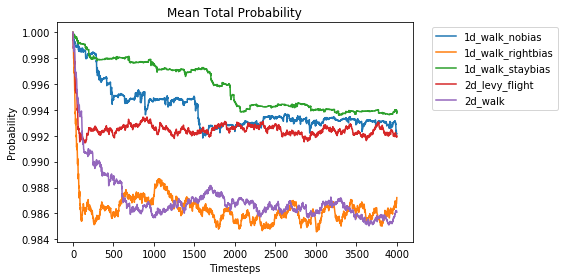

In [83]:
plt.figure(figsize=(8,4))
for name, dic in zip(names, dicts):
    plt.plot(dic['T_probabilities'], label=name[:-2])
plt.title("Mean Total Probability")
#plt.ylim(0,1.1)
#plt.xlim(-10,250)
plt.xlabel("Timesteps")
plt.ylabel("Probability")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig("prob.png", dpi=150)
plt.show()

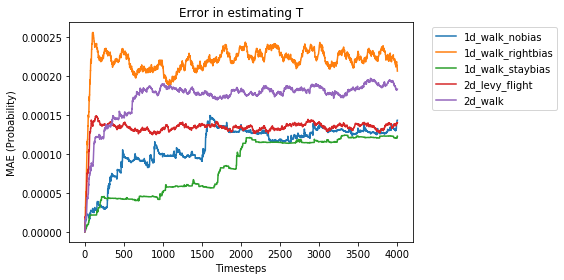

In [84]:
plt.figure(figsize=(8,4))
for name, dic in zip(names, dicts):
    plt.plot(dic['T_error'], label=name[:-2])
plt.title("Error in estimating T")
plt.xlabel("Timesteps")
plt.ylabel("MAE (Probability)")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.savefig("t_err.png", dpi=200)
plt.show()

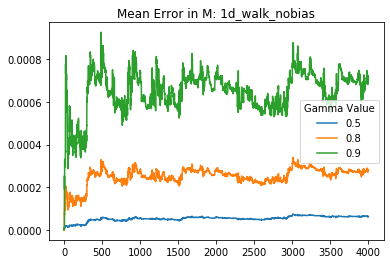

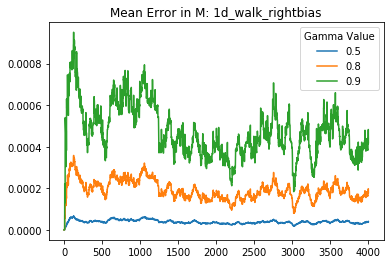

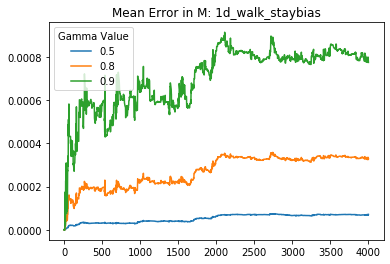

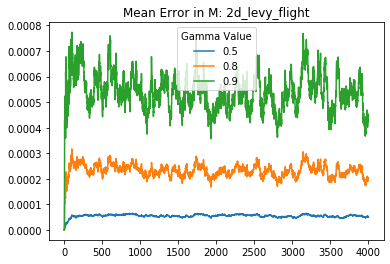

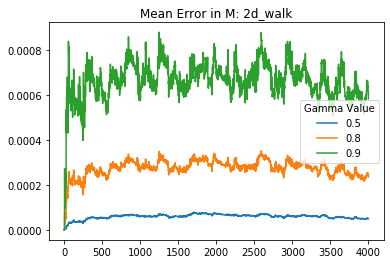

In [58]:
for name, dic in zip(names, dicts):
    plt.figure()
    for i, _gamma in enumerate(dic['test_gammas'][:-1]):
        plt.plot(dic['M_error'][i], label=str(_gamma))
    plt.title(f'Mean Error in M: {name[:-2]}')
    plt.legend(title="Gamma Value")
    plt.show()

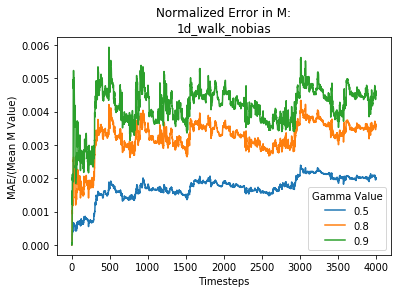

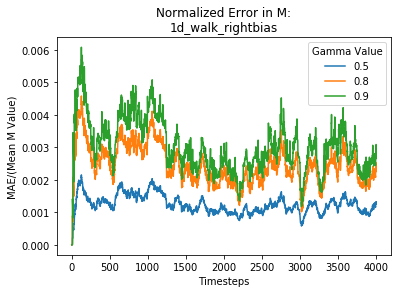

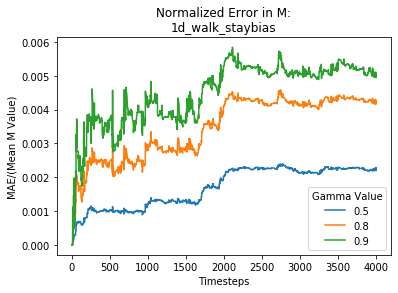

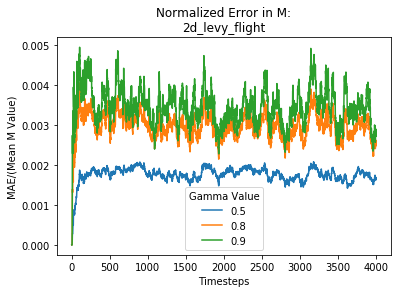

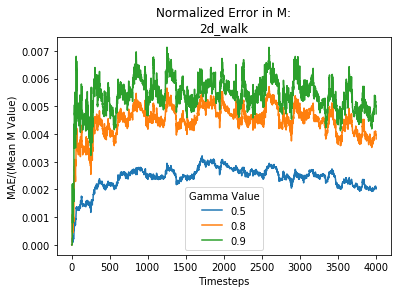

In [85]:
for name, dic in zip(names, dicts):
    plt.figure(figsize=(6,4))
    for i, _gamma in enumerate(dic['test_gammas'][:-1]):
        err = np.array(dic['M_error'][i])
        mean = np.mean(dic['M_mean'][i])
        plt.plot(err/mean, label=str(_gamma))
    plt.title(f'Normalized Error in M:\n{name[:-2]}')
    plt.xlabel("Timesteps")
    plt.ylabel("MAE/(Mean M Value)")
    plt.legend(title="Gamma Value")
    plt.savefig("m_err_" + name[:-2] + ".png", dpi=200)
    plt.show()